In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X = np.random.uniform(low = 0, high = 20, size = (500,1))
def target(x):
    return x+3*np.sin(2*x)

noise = np.random.normal(loc = 0, scale = 1, size = (500,1))
Y = target(X) + noise

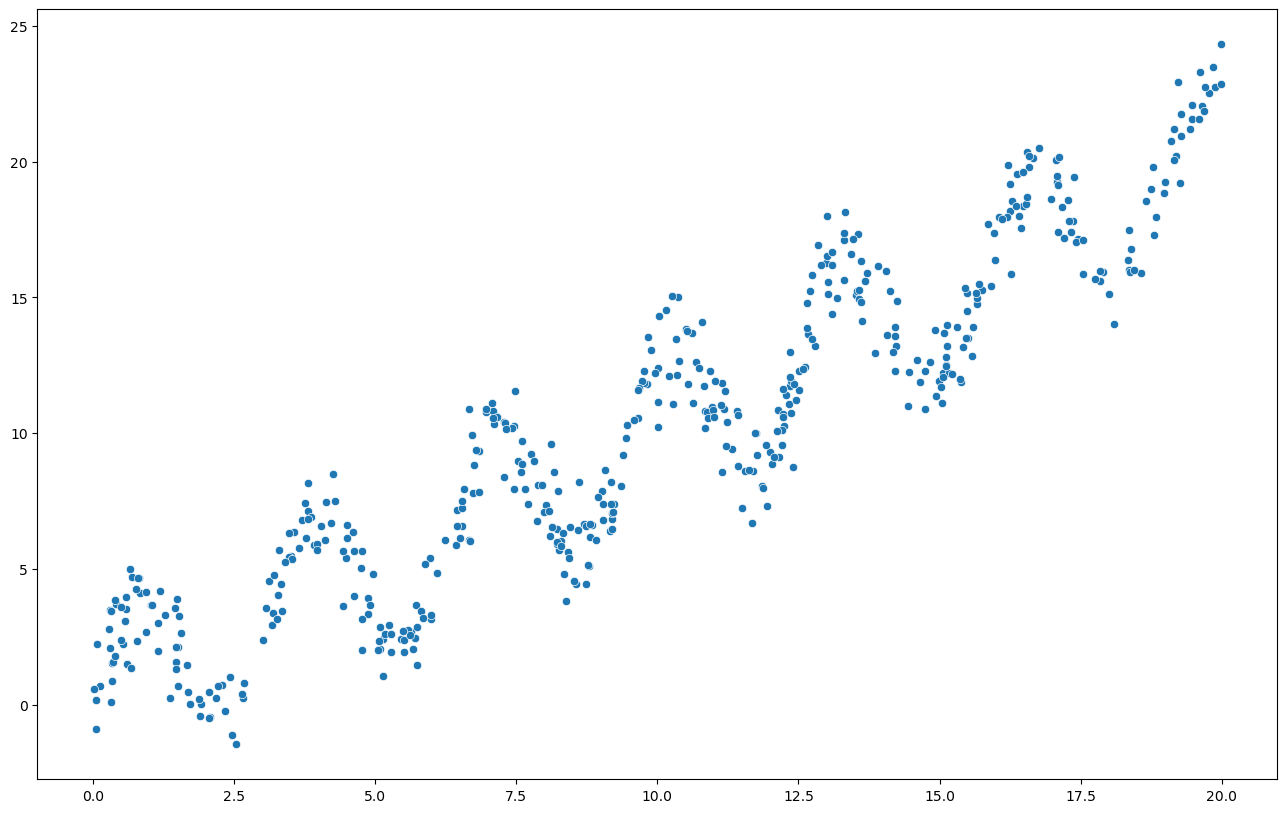

In [3]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.scatterplot(x=X.ravel(), y=Y.ravel())

plt.show()

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

splitter = KFold(n_splits = 5, shuffle = True, random_state = 33)
linear = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 3)

linear_cv = cross_validate(linear, X, Y,
                          cv = splitter, scoring = 'neg_mean_squared_error',
                          return_train_score = True)
knn_cv = cross_validate(knn, X, Y,
                       cv = splitter, scoring = 'neg_mean_squared_error',
                       return_train_score = True)

In [5]:
print(f'Среднее MSE у линейной регрессии на тренировочной выборке равно {-np.mean(linear_cv['train_score']).round(3)}')
print(f'Среднее MSE у линейной регрессии на тестовой выборке равно {-np.mean(linear_cv['test_score']).round(3)}')
print(f'Среднее MSE у KNN на тренировочной выборке равно {-np.mean(knn_cv['train_score']).round(3)}')
print(f'Среднее MSE у KNN на тестовой выборке равно {-np.mean(knn_cv['test_score']).round(3)}')


Среднее MSE у линейной регрессии на тренировочной выборке равно 5.319
Среднее MSE у линейной регрессии на тестовой выборке равно 5.377
Среднее MSE у KNN на тренировочной выборке равно 0.668
Среднее MSE у KNN на тестовой выборке равно 1.38


In [6]:
new_X = np.random.uniform(low = 20, high = 30, size = (50,1))
new_noise = np.random.normal(loc = 0,scale = 1, size = (50,1))

new_Y = target(new_X)+new_noise

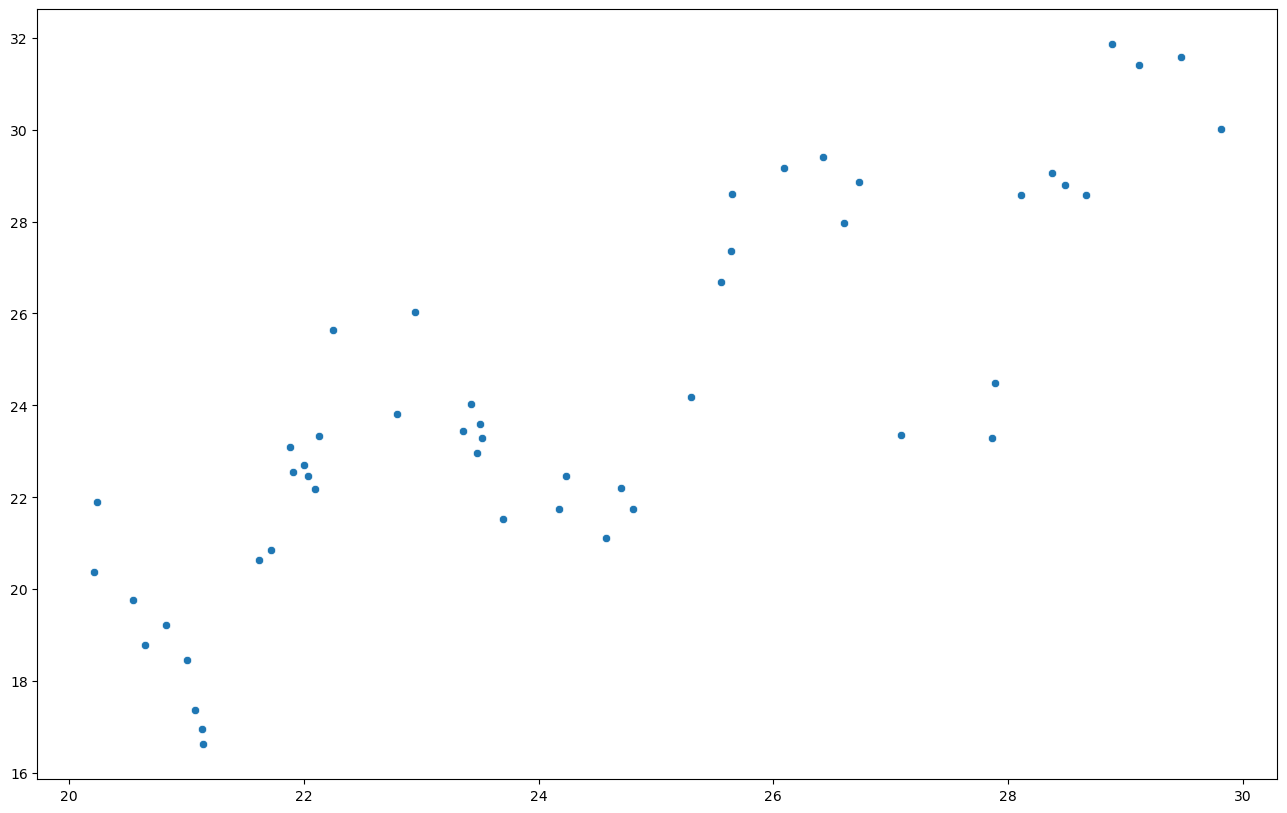

In [7]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.scatterplot(x = new_X.ravel(), y = new_Y.ravel())

plt.show()

In [8]:
knn.fit(X, Y)
linear.fit(X, Y)
knn_preds = knn.predict(new_X)
linear_preds = linear.predict(new_X)

print(f"MSE KNN модели на новых данных равна {np.mean((new_Y-knn_preds)**2).round(3)}")
print(f"MSE линейной модели на новых данных равна {np.mean((new_Y-linear_preds)**2).round(3)}")

MSE KNN модели на новых данных равна 16.042
MSE линейной модели на новых данных равна 4.869


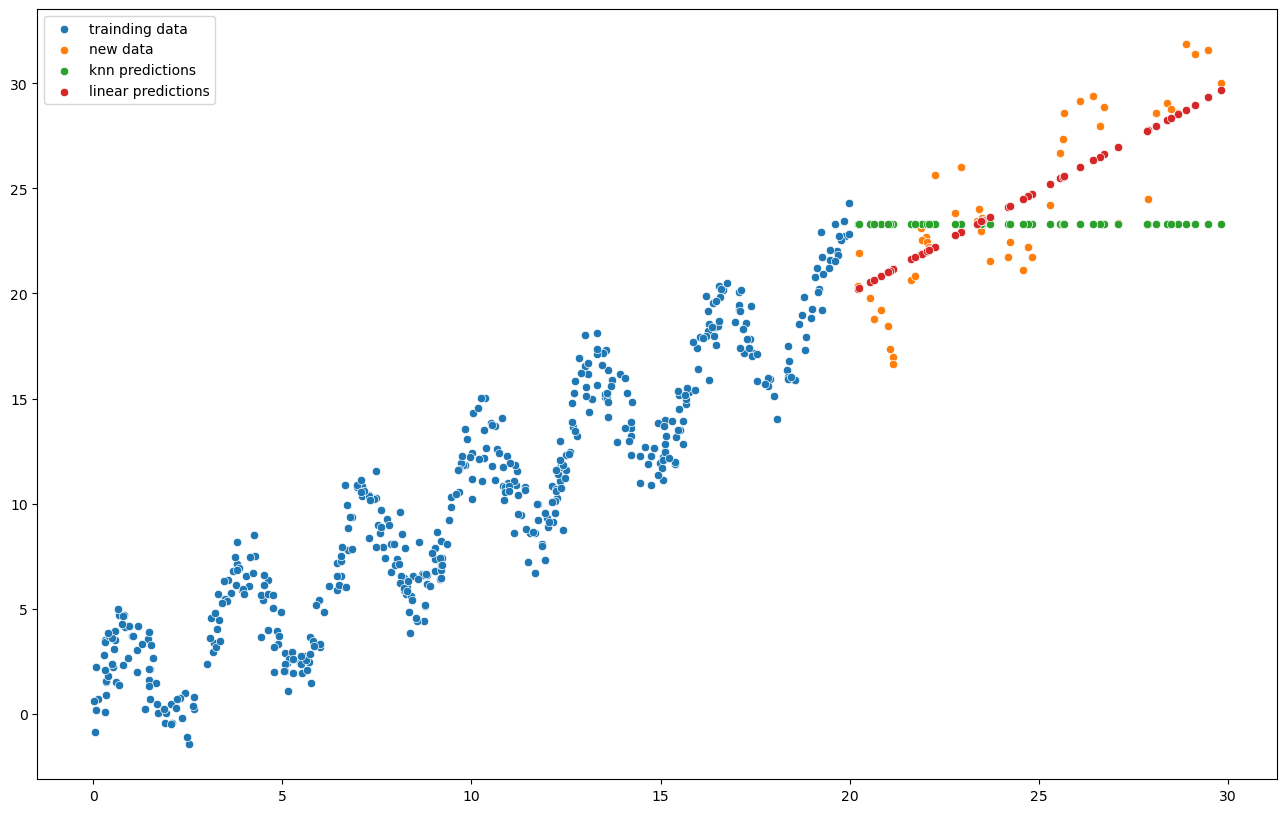

In [9]:
fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(x=X.ravel(), y=Y.ravel())
sns.scatterplot(x=new_X.ravel(), y=new_Y.ravel())
sns.scatterplot(x=new_X.ravel(), y=knn_preds.ravel())
sns.scatterplot(x=new_X.ravel(), y=linear_preds.ravel())
plt.legend(['trainding data', 'new data', 'knn predictions', 'linear predictions'])
plt.show()

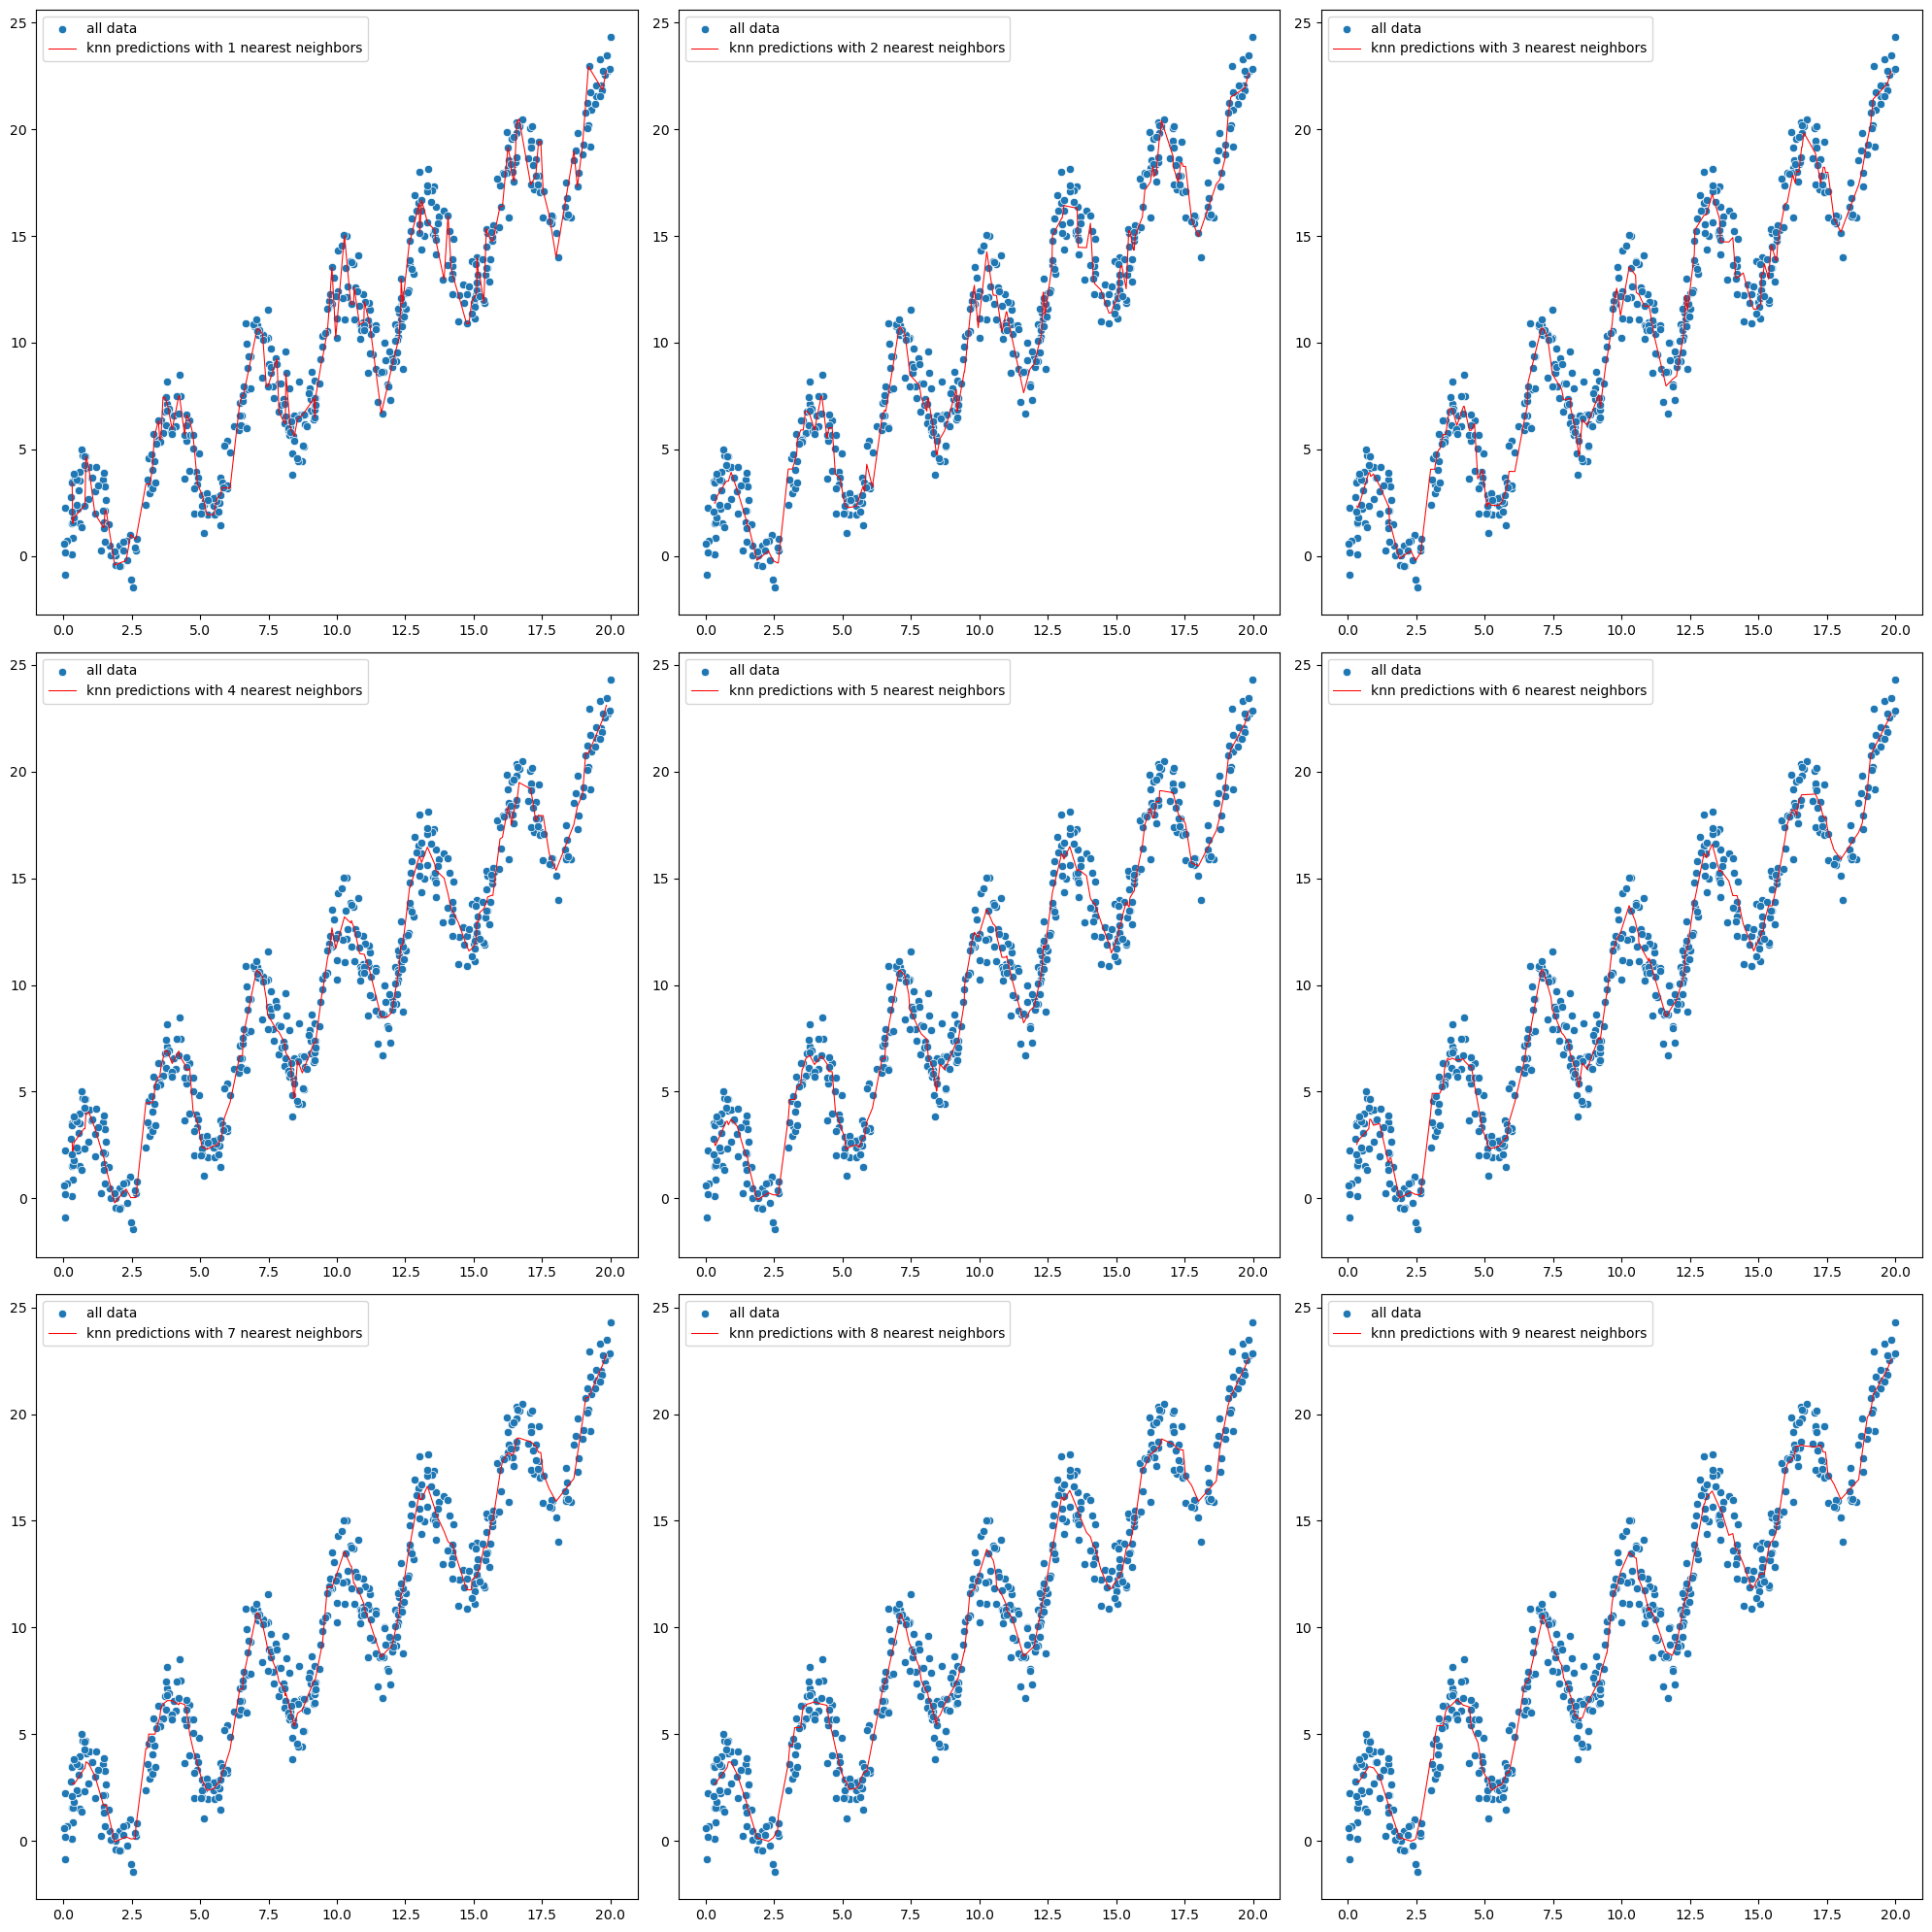

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.3,
                                                   random_state = 33)

fig = plt.figure()
fig.set_size_inches(20,20)
for K in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train, Y_train)

    preds_test = knn.predict(X_test)
    ax = fig.add_subplot(3,3,K)
    sns.scatterplot(x=X.ravel(), y=Y.ravel())
    sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), size = 3, color = 'red')
    plt.legend(['all data', f'knn predictions with {K} nearest neighbors'])

fig.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(knn, param_grid)

search.fit(X,Y)

print(f'best score is {search.best_score_:.5f}')
print(f'number of neighbors for best score is {search.best_params_}')

best score is 0.96487
number of neighbors for best score is {'n_neighbors': 6}


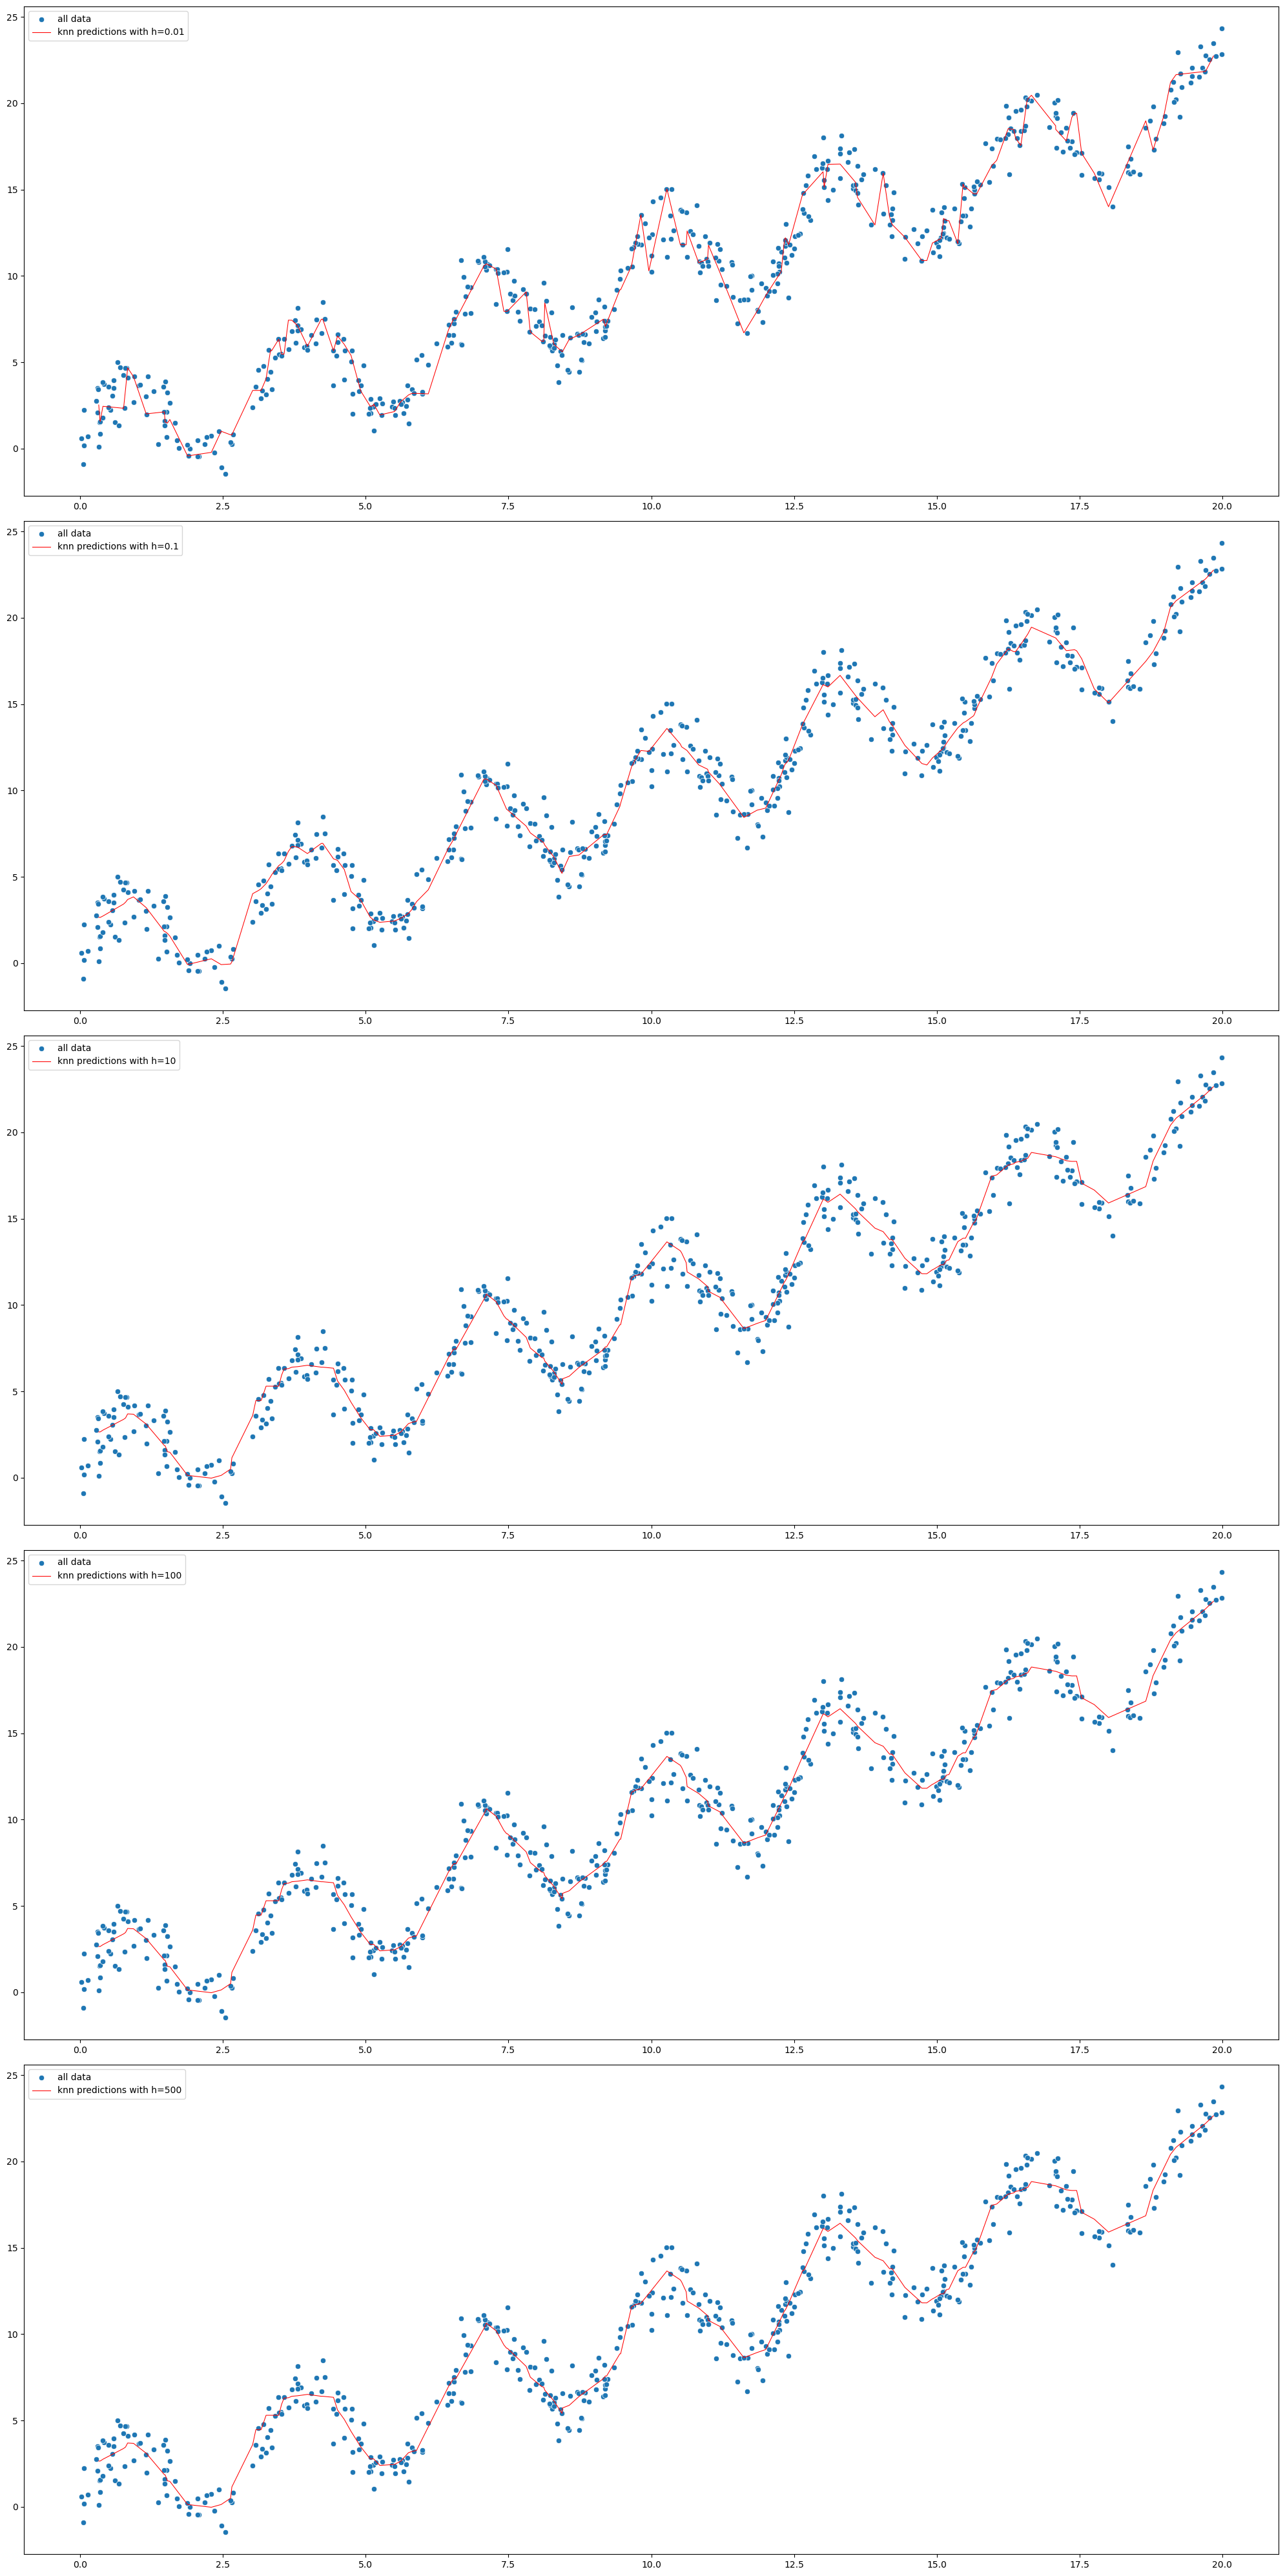

In [12]:
from sklearn.neighbors import KernelDensity
fig = plt.figure()
fig.set_size_inches(20,40)
k = 1
for h in [0.01, 0.1, 10, 100, 500]:
    def gaussKernel(distances, h=h):
        const = 1/np.sqrt(2*np.pi)
        power = (-1/2) * ((distances)**2)/h**2
        return const*np.exp(power)

    knn = KNeighborsRegressor(n_neighbors = 8, weights = gaussKernel)
    knn.fit(X_train, Y_train)
    preds_test = knn.predict(X_test)
    ax = plt.subplot(5,1,k)
    k+=1
    sns.scatterplot(x = X.ravel(), y = Y.ravel())
    sns.lineplot(x = X_test.ravel(), y = preds_test.ravel(), size = 10, color = 'red')
    plt.legend(["all data", f"knn predictions with h={h}"])
    
fig.tight_layout()

In [13]:
data = pd.read_excel('processed_segmentation.xlsx')
data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [14]:
X = data.drop('Segmentation', axis = 1)
Y = data['Segmentation']

In [15]:
def gaussKernel(distances, h = 1):
    const = 1 / np.sqrt(2*np.pi)
    power = -(1/2) * (distances**2)/h**2
    return const*np.exp(power)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.3,
                                                   random_state = 0)
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [17]:
print(f"Качество на трейне равно {np.mean(pipe.predict(X_train) == Y_train).round(3)}")
print(f"Качество на тесте равно {np.mean(pipe.predict(X_test) == Y_test).round(3)}")

Качество на трейне равно 0.642
Качество на тесте равно 0.473


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(weights = gaussKernel))])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.3,
                                                   random_state = 0)
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(weights=<function gaussKernel at 0x00000211AD649260>))])

In [19]:
print(f"Качество на трейне равно {np.mean(pipe.predict(X_train) == Y_train).round(3)}")
print(f"Качество на тесте равно {np.mean(pipe.predict(X_test) == Y_test).round(3)}")

Качество на трейне равно 0.75
Качество на тесте равно 0.482


In [20]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN',
   KNeighborsClassifier(weights=<function gaussKernel at 0x00000211AD649260>))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsClassifier(weights=<function gaussKernel at 0x00000211AD649260>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 5,
 'KNN__p': 2,
 'KNN__weights': <function __main__.gaussKernel(distances, h=1)>}

In [21]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

param_grid = {
    'KNN__n_neighbors': np.linspace(1, 100, 10, dtype = int),
    'KNN__p' : np.linspace(1,5,5,dtype = int),
    'KNN__weights' : ['uniform', 'distance', gaussKernel]
}

test_fold = [0 if x in X_test.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)
search = GridSearchCV(pipe, param_grid, cv = ps)
search.fit(X, Y)


best score is 0.51384


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [23]:
print(f"best score is {search.best_score_:.5f}")
print(f"params with best score are {search.best_params_}")

best score is 0.51384
params with best score are {'KNN__n_neighbors': np.int64(100), 'KNN__p': np.int64(1), 'KNN__weights': 'uniform'}
